<a href="https://colab.research.google.com/github/souban1234/KERAS_SERIES_WITH_BACKEND_TENSORFLOW/blob/main/Classify%20the%20images%20/codewarriors_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')



Mounted at /gdrive


In [ ]:

import tensorflow as tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator #generating images from training data
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
import numpy as np
from keras.optimizers import Adam,RMSprop
from tensorflow.keras.applications import VGG16

In [ ]:
batch_size=32
train_dir = r'/gdrive/My Drive/code_warriors_game_of_data_ai_challenge-dataset/train'
test_dir =r'/gdrive/My Drive/code_warriors_game_of_data_ai_challenge-dataset/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
       validation_split=0.2,
       )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    subset='validation')

test_generator =test_datagen.flow_from_directory(test_dir,target_size =(150,150), batch_size=batch_size,class_mode="categorical")


Found 3949 images belonging to 11 classes.
Found 982 images belonging to 11 classes.
Found 1671 images belonging to 1 classes.


In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(11, activation='sigmoid'))

In [ ]:
model.compile(optimizer = Adam(lr=2e-5), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [ ]:

history=model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 100,
    callbacks=[checkpoint_cb]
    )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
123/123 [==============================] - 2465s 20s/step - loss: 1.8619 - accuracy: 0.3559 - val_loss: 1.4370 - val_accuracy: 0.5200
Epoch 2/100
123/123 [==============================] - 198s 2s/step - loss: 1.2387 - accuracy: 0.5841 - val_loss: 1.3478 - val_accuracy: 0.5200
Epoch 3/100
123/123 [==============================] - 111s 900ms/step - loss: 1.0217 - accuracy: 0.6525 - val_loss: 1.0158 - val_accuracy: 0.6633
Epoch 4/100
123/123 [==============================] - 91s 738ms/step - loss: 0.8925 - accuracy: 0.7010 - val_loss: 0.9831 - val_accuracy: 0.6500
Epoch 5/100
123/123 [==============================] - 80s 651ms/step - loss: 0.7704 - accuracy: 0.7424 - val_loss: 0.9462 - val_accuracy: 0.6683
Epoch 6/100
123/123 [==============================] - 75s 607ms/step - loss: 0.6822 - accuracy: 0.7669 - val_loss: 0.8725 - val_accuracy: 0.7200
Epoch 7/100
123/123 [============================

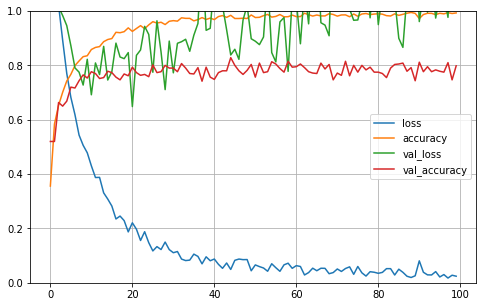

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
hist_df = pd.DataFrame(history.history) 

In [ ]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 1671 images belonging to 1 classes.


In [ ]:
model.load_weights("CNN_Project_Model-45.h5")

In [ ]:
model.evaluate_generator(test_generator, steps=83)

[135.5532684326172, 0.10180722922086716]

In [ ]:
from keras.preprocessing import image
import os

# image folder
folder_path = '/gdrive/My Drive/code_warriors_game_of_data_ai_challenge-dataset/test/test_image'

# load all images into a list
images = []
img_name=[]
for img in os.listdir(folder_path):
    img_name.append(img)
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(150,150,3),grayscale=False)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
    
images = np.vstack(images)
img_name=np.array(img_name)
classes = model.predict_classes(images, batch_size=20)
print(classes)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[ 0 10  5 ...  2  0  0]


In [ ]:
classes_name=train_generator.class_indices
print(classes_name)
inverted_classes = dict(map(reversed, classes_name.items()))
print(inverted_classes)

{'Bread': 0, 'Dairy product': 1, 'Dessert': 2, 'Egg': 3, 'Fried food': 4, 'Meat': 5, 'Noodles-Pasta': 6, 'Rice': 7, 'Seafood': 8, 'Soup': 9, 'Vegetable-Fruit': 10}
{0: 'Bread', 1: 'Dairy product', 2: 'Dessert', 3: 'Egg', 4: 'Fried food', 5: 'Meat', 6: 'Noodles-Pasta', 7: 'Rice', 8: 'Seafood', 9: 'Soup', 10: 'Vegetable-Fruit'}


In [ ]:

prediction_classes = [ inverted_classes.get(item,item) for item in classes ]
prediction_classes


['Bread',
 'Vegetable-Fruit',
 'Meat',
 'Bread',
 'Bread',
 'Bread',
 'Dairy product',
 'Bread',
 'Egg',
 'Bread',
 'Bread',
 'Bread',
 'Meat',
 'Bread',
 'Dessert',
 'Bread',
 'Bread',
 'Bread',
 'Bread',
 'Dessert',
 'Bread',
 'Bread',
 'Dessert',
 'Bread',
 'Bread',
 'Bread',
 'Bread',
 'Bread',
 'Vegetable-Fruit',
 'Dessert',
 'Dessert',
 'Soup',
 'Soup',
 'Bread',
 'Bread',
 'Bread',
 'Dairy product',
 'Bread',
 'Bread',
 'Bread',
 'Dessert',
 'Soup',
 'Bread',
 'Bread',
 'Bread',
 'Bread',
 'Bread',
 'Dessert',
 'Soup',
 'Bread',
 'Bread',
 'Dairy product',
 'Bread',
 'Soup',
 'Dessert',
 'Bread',
 'Bread',
 'Soup',
 'Bread',
 'Meat',
 'Bread',
 'Bread',
 'Bread',
 'Bread',
 'Bread',
 'Meat',
 'Dessert',
 'Vegetable-Fruit',
 'Meat',
 'Bread',
 'Dessert',
 'Bread',
 'Fried food',
 'Bread',
 'Bread',
 'Bread',
 'Bread',
 'Vegetable-Fruit',
 'Bread',
 'Bread',
 'Bread',
 'Bread',
 'Bread',
 'Bread',
 'Dessert',
 'Bread',
 'Bread',
 'Bread',
 'Dessert',
 'Vegetable-Fruit',
 'Soup',
 

In [ ]:
import pandas as pd
df4 = pd.DataFrame({'filename':img_name,'class':prediction_classes})
df4.sort_values("filename",ascending=True,inplace=True)
df4.reset_index(drop=True,level=False,inplace=True)

In [ ]:
df4.to_csv("output.csv",index=False)

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      callbacks=[checkpoint_cb])

In [ ]:

#step1 Initializing CNN
model = Sequential()

# step2 adding 1st Convolution layer and Pooling layer
model.add(Conv2D(32,(3,3),input_shape = (128,128,3), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))

# step3 adding 2nd convolution layer and polling layer
model.add(Conv2D(32,(3,3), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))


#step4 Flattening the layers
model.add(Flatten())

#step5 Full_Connection

model.add(Dense(units=32,activation = 'relu'))

model.add(Dense(units=64,activation = 'relu')) 

model.add(Dense(units=128,activation = 'relu'))

model.add(Dense(units=256,activation = 'relu'))

model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=2048,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units=11,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                921632    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2

In [ ]:
model1 = Sequential()

# Conv (evrişim katmanı)
model1.add(Conv2D(64, (5, 5), activation='relu', padding="same", input_shape=(128,128,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Activation('relu'))

model1.add(Conv2D(128, (5, 5), activation='relu', padding="same"))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Activation('relu'))

model1.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(3,3)))
model1.add(Activation('relu'))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))
model1.add(Dense(11, activation='softmax'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 64)      4864      
_________________________________________________________________
batch_normalization_8 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
activation_6 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 128)       204928    
_________________________________________________________________
batch_normalization_9 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 128)      

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(filters = 56,kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
classifier.add(MaxPooling2D(pool_size = (2,2)))
#second Convolutional layer
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
#Flattening best score=70
classifier.add(Flatten())
#Hidden Layer
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
#Output Layer
classifier.add(Dense(units = 11 , activation = 'softmax'))
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 56)      1568      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 56)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 32)        16160     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                1843264   
_________________________________________________________________
dense_16 (Dense)             (None, 128)              

In [ ]:
img_width, img_height = 128,128
train_data_dir = r"/gdrive/My Drive/code_warriors_game_of_data_ai_challenge-dataset/train" #read as a line
test_data_dir=r"/gdrive/My Drive/code_warriors_game_of_data_ai_challenge-dataset/test"
nb_train_sample =300
nb_validation_samples =300
epochs =20
batch_size= 64

In [ ]:

train_datagen=ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)


test_datagen=ImageDataGenerator(rescale=1. /255)


train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='categorical')

test_generator =test_datagen.flow_from_directory(test_data_dir,target_size =(128,128), batch_size=batch_size,class_mode="categorical")

Found 4931 images belonging to 11 classes.
Found 1671 images belonging to 1 classes.


In [ ]:
model.compile(optimizer = 'Rmsprop', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy','accuracy'])

In [ ]:
model.fit_generator(train_generator, epochs = 300, steps_per_epoch = 50 )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/300
50/50 [==============================] - 1418s 28s/step - loss: 2.3655 - categorical_accuracy: 0.1500 - accuracy: 0.1500
Epoch 2/300
50/50 [==============================] - 491s 10s/step - loss: 2.3486 - categorical_accuracy: 0.1883 - accuracy: 0.1883
Epoch 3/300
50/50 [==============================] - 205s 4s/step - loss: 2.1975 - categorical_accuracy: 0.2150 - accuracy: 0.2150
Epoch 4/300
50/50 [==============================] - 77s 2s/step - loss: 2.1898 - categorical_accuracy: 0.2134 - accuracy: 0.2134
Epoch 5/300
50/50 [==============================] - 41s 820ms/step - loss: 2.1658 - categorical_accuracy: 0.2192 - accuracy: 0.2192
Epoch 6/300
50/50 [==============================] - 38s 760ms/step - loss: 2.1224 - categorical_accuracy: 0.2313 - accuracy: 0.2313
Epoch 7/300
50/50 [==============================] - 31s 626ms/step - loss: 2.0935 - categorical_accuracy: 0.2625 - accuracy: 0.2625

In [ ]:
from keras.preprocessing import image
import os

# image folder
folder_path = '/gdrive/My Drive/code_warriors_game_of_data_ai_challenge-dataset/test/test_image'

# load all images into a list
images = []
img_name=[]
for img in os.listdir(folder_path):
    img_name.append(img)
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(128,128,3),grayscale=False)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
    
images = np.vstack(images)
img_name=np.array(img_name)
classes = model.predict_classes(images, batch_size=10)
print(classes)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[ 5 10  8 ...  4  8  2]


In [ ]:
classes_name=train_generator.class_indices
print(classes_name)
inverted_classes = dict(map(reversed, classes_name.items()))
print(inverted_classes)


{'Bread': 0, 'Dairy product': 1, 'Dessert': 2, 'Egg': 3, 'Fried food': 4, 'Meat': 5, 'Noodles-Pasta': 6, 'Rice': 7, 'Seafood': 8, 'Soup': 9, 'Vegetable-Fruit': 10}
{0: 'Bread', 1: 'Dairy product', 2: 'Dessert', 3: 'Egg', 4: 'Fried food', 5: 'Meat', 6: 'Noodles-Pasta', 7: 'Rice', 8: 'Seafood', 9: 'Soup', 10: 'Vegetable-Fruit'}


In [ ]:

from keras.models import load_model

model.save('facefeatures3_new_model.h5')

In [ ]:
prediction_classes = [ inverted_classes.get(item,item) for item in classes ]
prediction_classes

['Meat',
 'Vegetable-Fruit',
 'Seafood',
 'Seafood',
 'Fried food',
 'Soup',
 'Dessert',
 'Fried food',
 'Dessert',
 'Meat',
 'Dessert',
 'Fried food',
 'Soup',
 'Meat',
 'Seafood',
 'Seafood',
 'Dessert',
 'Fried food',
 'Meat',
 'Dessert',
 'Seafood',
 'Egg',
 'Dessert',
 'Meat',
 'Seafood',
 'Fried food',
 'Seafood',
 'Fried food',
 'Vegetable-Fruit',
 'Meat',
 'Seafood',
 'Soup',
 'Fried food',
 'Dessert',
 'Seafood',
 'Dessert',
 'Fried food',
 'Fried food',
 'Dessert',
 'Dessert',
 'Dessert',
 'Soup',
 'Fried food',
 'Fried food',
 'Seafood',
 'Fried food',
 'Soup',
 'Dessert',
 'Soup',
 'Dessert',
 'Meat',
 'Dessert',
 'Dessert',
 'Dessert',
 'Dessert',
 'Seafood',
 'Fried food',
 'Soup',
 'Vegetable-Fruit',
 'Meat',
 'Seafood',
 'Fried food',
 'Dessert',
 'Meat',
 'Seafood',
 'Dessert',
 'Soup',
 'Vegetable-Fruit',
 'Dessert',
 'Seafood',
 'Dessert',
 'Dessert',
 'Fried food',
 'Seafood',
 'Dessert',
 'Dessert',
 'Fried food',
 'Vegetable-Fruit',
 'Fried food',
 'Seafood',
 'De

In [ ]:
import pandas as pd
df4 = pd.DataFrame({'filename':img_name,'class':prediction_classes})
df4.sort_values("filename",ascending=True,inplace=True)
df4.reset_index(drop=True,level=False,inplace=True)

In [ ]:
df4

,filename,class
0,0000.jpg,Seafood
1,0001.jpg,Fried food
2,0002.jpg,Dessert
3,0003.jpg,Dessert
4,0004.jpg,Vegetable-Fruit
...,...,...
1666,1666.jpg,Dessert
1667,1667.jpg,Dessert
1668,1668.jpg,Soup
1669,1669.jpg,Vegetable-Fruit


In [ ]:
df4.to_csv("output.csv",index=False)

In [ ]:
img_width, img_height = 150,150
train_data_dir = r"/gdrive/My Drive/code_warriors_game_of_data_ai_challenge-dataset/train" #read as a line
validation_data_dir=r"/gdrive/My Drive/code_warriors_game_of_data_ai_challenge-dataset/test"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [ ]:
import tensorflow.keras.backend as k #150*150*3 or 3*150*150 #channels, width of the image and height of the image
if k.image_data_format()=='channels_first': # whether this is RGB or not
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)



train_datagen=ImageDataGenerator( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)


test_datagen=ImageDataGenerator(rescale=1. /255)


train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='categorical')

validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode="categorical")

Found 4931 images belonging to 11 classes.
Found 1671 images belonging to 1 classes.


In [ ]:

#step1 Initializing CNN
model = Sequential()

# step2 adding 1st Convolution layer and Pooling layer
model.add(Conv2D(32,(3,3),input_shape = input_shape, activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))

# step3 adding 2nd convolution layer and polling layer
model.add(Conv2D(32,(3,3), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))


#step4 Flattening the layers
model.add(Flatten())

#step5 Full_Connection

model.add(Dense(units=32,activation = 'relu'))

model.add(Dense(units=64,activation = 'relu')) 

model.add(Dense(units=128,activation = 'relu'))

model.add(Dense(units=256,activation = 'relu'))

model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=2048,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units=11,activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1327136   
_________________________________________________________________
dense_15 (Dense)             (None, 64)               

In [ ]:
model.compile(optimizer = Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = ['categorical_accuracy','accuracy'])

In [ ]:
model.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)
                    


Epoch 1/20
100/100 [==============================] - 28s 285ms/step - loss: 1.7021 - categorical_accuracy: 0.3767 - accuracy: 0.3767 - val_loss: 48.2227 - val_categorical_accuracy: 0.0126 - val_accuracy: 0.0126
Epoch 2/20
100/100 [==============================] - 20s 196ms/step - loss: 1.7357 - categorical_accuracy: 0.3730 - accuracy: 0.3730
Epoch 3/20
100/100 [==============================] - 20s 199ms/step - loss: 1.7432 - categorical_accuracy: 0.3656 - accuracy: 0.3656
Epoch 4/20
100/100 [==============================] - 19s 190ms/step - loss: 1.6643 - categorical_accuracy: 0.4050 - accuracy: 0.4050
Epoch 5/20
100/100 [==============================] - 19s 194ms/step - loss: 1.6481 - categorical_accuracy: 0.3993 - accuracy: 0.3993
Epoch 6/20
100/100 [==============================] - 19s 190ms/step - loss: 1.7140 - categorical_accuracy: 0.3772 - accuracy: 0.3772
Epoch 7/20
100/100 [==============================] - 21s 207ms/step - loss: 1.6786 - categorical_accuracy: 0.3850 - a

In [ ]:
# image folder
folder_path = '/gdrive/My Drive/code_warriors_game_of_data_ai_challenge-dataset/test/test_image'

# load all images into a list
images = []
img_name=[]
for img in os.listdir(folder_path):
    img_name.append(img)
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(150,150,3),grayscale=False)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
    
images = np.vstack(images)
img_name=np.array(img_name)
classes = model.predict_classes(images, batch_size=10)
print(classes)

[10 10 10 ... 10 10 10]


In [ ]:
prediction_classes = [ inverted_classes.get(item,item) for item in classes ]
prediction_classes

['Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Noodles-Pasta',
 'Vegetable-Fruit',
 'Meat',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Soup',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Meat',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Soup',
 'Noodles-Pasta',
 'Vegetable-Fruit',
 'Meat',
 'Dessert',
 'Noodles-Pasta',
 'Vegetable-Fruit',
 'Meat',
 'Vegetable-Fruit',
 'Dessert',
 'Soup',
 'Vegetable-Fruit',
 'Dessert',
 'Vegetable-Fruit',
 'Meat',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Dessert',
 'Meat',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Noodles-Pasta',
 'Soup',
 'Soup',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 

In [ ]:
classes_name=train_generator.class_indices
print(classes_name)
inverted_classes = dict(map(reversed, classes_name.items()))
print(inverted_classes)

{'Bread': 0, 'Dairy product': 1, 'Dessert': 2, 'Egg': 3, 'Fried food': 4, 'Meat': 5, 'Noodles-Pasta': 6, 'Rice': 7, 'Seafood': 8, 'Soup': 9, 'Vegetable-Fruit': 10}
{0: 'Bread', 1: 'Dairy product', 2: 'Dessert', 3: 'Egg', 4: 'Fried food', 5: 'Meat', 6: 'Noodles-Pasta', 7: 'Rice', 8: 'Seafood', 9: 'Soup', 10: 'Vegetable-Fruit'}


In [ ]:
import pandas as pd
df3 = pd.DataFrame({'filename':img_name,'class':prediction_classes})
df3.sort_values("filename",ascending=True,inplace=True)
df3.reset_index(drop=True,level=False,inplace=True)
df3.to_csv("output.csv",index=False)

In [ ]:

from keras.models import load_model

model.save('facefeatures1_new_model.h5')

In [ ]:
from keras.preprocessing import image
import os

# image folder
folder_path = '/gdrive/My Drive/code_warriors_game_of_data_ai_challenge-dataset/test/test_image'

# load all images into a list
images = []
img_name=[]
for img in os.listdir(folder_path):
    img_name.append(img)
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(224,224,3),grayscale=False)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
    
images = np.vstack(images)
img_name=np.array(img_name)
classes = model.predict_classes(images, batch_size=10)
print(classes)

[ 6 10  2 ...  6  1  2]


In [ ]:
prediction_classes = [ inverted_classes.get(item,item) for item in classes ]
prediction_classes

['Egg',
 'Fried food',
 'Meat',
 'Dessert',
 'Soup',
 'Dessert',
 'Seafood',
 'Dessert',
 'Egg',
 'Fried food',
 'Dessert',
 'Fried food',
 'Fried food',
 'Dessert',
 'Seafood',
 'Dessert',
 'Fried food',
 'Fried food',
 'Meat',
 'Seafood',
 'Rice',
 'Egg',
 'Dessert',
 'Dessert',
 'Dessert',
 'Fried food',
 'Dessert',
 'Noodles-Pasta',
 'Vegetable-Fruit',
 'Meat',
 'Seafood',
 'Soup',
 'Soup',
 'Dairy product',
 'Seafood',
 'Fried food',
 'Dairy product',
 'Bread',
 'Dessert',
 'Seafood',
 'Dessert',
 'Bread',
 'Bread',
 'Fried food',
 'Seafood',
 'Egg',
 'Noodles-Pasta',
 'Dessert',
 'Dessert',
 'Dessert',
 'Dessert',
 'Dairy product',
 'Bread',
 'Soup',
 'Dessert',
 'Meat',
 'Bread',
 'Seafood',
 'Noodles-Pasta',
 'Meat',
 'Noodles-Pasta',
 'Egg',
 'Egg',
 'Fried food',
 'Bread',
 'Meat',
 'Meat',
 'Vegetable-Fruit',
 'Dessert',
 'Rice',
 'Seafood',
 'Bread',
 'Rice',
 'Seafood',
 'Dessert',
 'Seafood',
 'Fried food',
 'Vegetable-Fruit',
 'Meat',
 'Dessert',
 'Soup',
 'Dessert',
 'R

In [ ]:
classes_name=train_generator.class_indices
print(classes_name)
inverted_classes = dict(map(reversed, classes_name.items()))
print(inverted_classes)


{'Bread': 0, 'Dairy product': 1, 'Dessert': 2, 'Egg': 3, 'Fried food': 4, 'Meat': 5, 'Noodles-Pasta': 6, 'Rice': 7, 'Seafood': 8, 'Soup': 9, 'Vegetable-Fruit': 10}
{0: 'Bread', 1: 'Dairy product', 2: 'Dessert', 3: 'Egg', 4: 'Fried food', 5: 'Meat', 6: 'Noodles-Pasta', 7: 'Rice', 8: 'Seafood', 9: 'Soup', 10: 'Vegetable-Fruit'}


In [ ]:
prediction_classes = [ inverted_classes.get(item,item) for item in classes ]
prediction_classes

['Noodles-Pasta',
 'Vegetable-Fruit',
 'Dessert',
 'Dessert',
 'Noodles-Pasta',
 'Dessert',
 'Soup',
 'Noodles-Pasta',
 'Noodles-Pasta',
 'Meat',
 'Soup',
 'Fried food',
 'Meat',
 'Dessert',
 'Dessert',
 'Meat',
 'Meat',
 'Noodles-Pasta',
 'Meat',
 'Noodles-Pasta',
 'Dairy product',
 'Dessert',
 'Dessert',
 'Noodles-Pasta',
 'Meat',
 'Noodles-Pasta',
 'Vegetable-Fruit',
 'Meat',
 'Vegetable-Fruit',
 'Noodles-Pasta',
 'Vegetable-Fruit',
 'Dairy product',
 'Noodles-Pasta',
 'Dessert',
 'Dessert',
 'Meat',
 'Noodles-Pasta',
 'Soup',
 'Dessert',
 'Fried food',
 'Dessert',
 'Noodles-Pasta',
 'Noodles-Pasta',
 'Dessert',
 'Dessert',
 'Noodles-Pasta',
 'Noodles-Pasta',
 'Dessert',
 'Meat',
 'Noodles-Pasta',
 'Meat',
 'Dessert',
 'Noodles-Pasta',
 'Soup',
 'Dairy product',
 'Meat',
 'Noodles-Pasta',
 'Dairy product',
 'Noodles-Pasta',
 'Seafood',
 'Noodles-Pasta',
 'Noodles-Pasta',
 'Rice',
 'Noodles-Pasta',
 'Vegetable-Fruit',
 'Dessert',
 'Meat',
 'Noodles-Pasta',
 'Dessert',
 'Noodles-Pasta

In [ ]:
import pandas as pd
df3 = pd.DataFrame({'filename':img_name,'class':prediction_classes})
df3.sort_values("filename",ascending=True,inplace=True)
df3.reset_index(drop=True,level=False,inplace=True)

In [ ]:
df3.head()

,filename,class
0,0000.jpg,Noodles-Pasta
1,0001.jpg,Seafood
2,0002.jpg,Seafood
3,0003.jpg,Dessert
4,0004.jpg,Noodles-Pasta


In [ ]:
df3.to_csv("output.csv",index=False)

In [ ]:
import pandas as pd
df = pd.DataFrame({'filename':img_name,'class':prediction_classes})
df.sort_values("filename",ascending=True,inplace=True)
df.reset_index(drop=True,level=False,inplace=True)

In [ ]:
df.head()

,filename,class
0,0000.jpg,Noodles-Pasta
1,0001.jpg,Noodles-Pasta
2,0002.jpg,Dessert
3,0003.jpg,Dessert
4,0004.jpg,Noodles-Pasta


In [ ]:

from keras.models import load_model

model.save('facefeatures_new_model.h5')


In [ ]:
df.to_csv("output.csv",header=True)

In [ ]:
new_model = tensorflow.keras.models.load_model('facefeatures1_new_model.h5')

OSError: ignored